# proyecto S2 : Introducción a los Modelos de Previsión en Series Temporales

# 0. ObjetivoEl objetivo de este proyecto es realizar previsiones de series temporales, utilizando modelos sencillos para familiarizarnos con los principales conceptos de la modelización y previsión de variables

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe que incluya nuestro histórico y las fechas en las que queremos hacer la previsión.

No olvides que seguimos trabajando con series temporales, por lo que, tendremos una variable tiempo.

In [120]:
## Lectura de los datos
data_path = 'retail_sales.csv'
df_sales = pd.read_csv(data_path)

In [121]:
# Visualizamos los datos cargados
df_sales.info()
df_sales.describe()
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    72 non-null     object
 1   sales   72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


In [122]:
## Creamos un dataframe con el histórico
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y-%m-%d')
df_sales = df_sales.set_index('date').sort_index()
df_sales

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022
...,...
2015-05-01,462615
2015-06-01,448229
2015-07-01,457710


Recordemos que vamos a realizar la predicción sobre el siguiente año.

In [123]:
## Periodos en los que vamos a hacer la predicción
# próximo año
periodos = pd.date_range(start='2015-10-01', periods=12, freq='MS')
periodos

DatetimeIndex(['2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [124]:
# Creamos un dataframe con nuestras fechas a predecir
df_prediccion = pd.DataFrame({'sales': [np.nan] * 12}, index=periodos)
df_prediccion

,sales
2015-10-01,NaN
2015-11-01,NaN
2015-12-01,NaN
2016-01-01,NaN
2016-02-01,NaN
2016-03-01,NaN
2016-04-01,NaN
2016-05-01,NaN
2016-06-01,NaN
2016-07-01,NaN


In [125]:
# Unimos el dataframe del histórico y el de la predicción
df_sales = pd.concat([df_sales, df_prediccion])
df_sales

,sales
2009-10-01,338630.0
2009-11-01,339386.0
2009-12-01,400264.0
2010-01-01,314640.0
2010-02-01,311022.0
...,...
2016-05-01,NaN
2016-06-01,NaN
2016-07-01,NaN
2016-08-01,NaN


## 3. Componentes de la serie temporal

Representa la serie resultante.

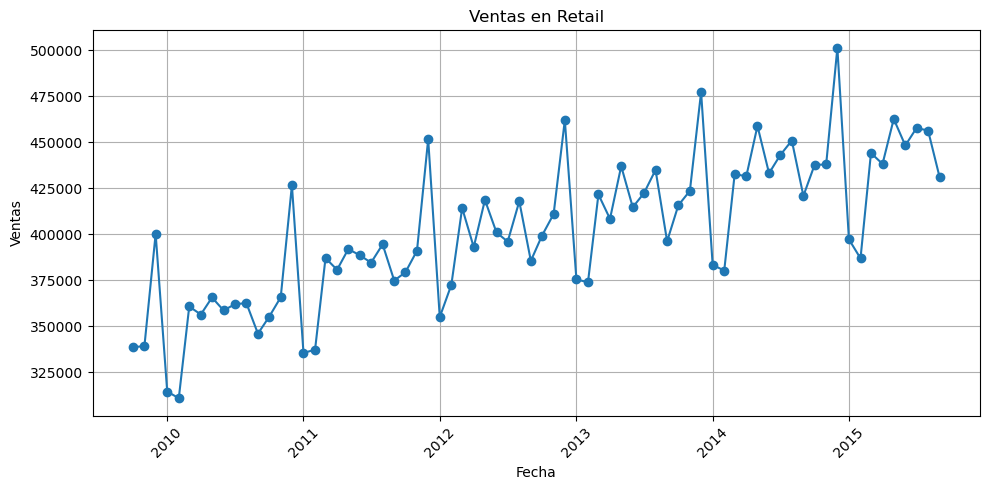

In [126]:
## Representamos la serie temporal
plt.figure(figsize=(10,5))
plt.plot(df_sales.index, df_sales['sales'], marker='o')
plt.title('Ventas en Retail')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### *P: ¿Qué componentes de una serie temporal tiene las ventas en retail?*

In [127]:
"""
    - Tendencia: Se observa una tendencia creciente a lo largo del tiempo, 
    lo que indica un aumento general en las ventas retail durante el período 
    analizado.
    
    - Estacionalidad: Hay un patrón que se repite anualmente, con:
        - Picos en diciembre (temporada navideña)
        - Caídas en enero-febrero (post temporada navideña)
        - Repuntes moderados en mitad de año

    -Componente aleatoria: Se observan fluctuaciones irregulares alrededor de 
    la tendencia y la estacionalidad, que pueden deberse a eventos especiales, 
    promociones, o factores externos no predecibles o no conocidos.
"""

'\n    - Tendencia: Se observa una tendencia creciente a lo largo del tiempo, \n    lo que indica un aumento general en las ventas retail durante el período \n    analizado.\n    \n    - Estacionalidad: Hay un patrón que se repite anualmente, con:\n        - Picos en diciembre (temporada navideña)\n        - Caídas en enero-febrero (post temporada navideña)\n        - Repuntes moderados en mitad de año\n\n    -Componente aleatoria: Se observan fluctuaciones irregulares alrededor de \n    la tendencia y la estacionalidad, que pueden deberse a eventos especiales, \n    promociones, o factores externos no predecibles o no conocidos.\n'

## 4. Predicciones mejoradas sobre la serie temporal

Para realizar las predicciones vamos a eliminar primero las componentes de la serie temporal, de manera que calculemos nuestra previsión sobre el residuo.

### 4.1.-  Eliminar las componentes de la serie: estacionalidad y tendencia

#### a) Elimina la estacionalidad y representa los resultados.

##### *P: ¿Cómo podemos eliminar la estacionalidad? ¿Qué ventana móvil debemos usar? ¿Por qué?*

In [128]:
# ya que los datos son mensuales y queremos eliminar el patrón anual

In [129]:
## Eliminamos la estacionalidad de la serie
ventana = 12
df_sales['sales_mm'] = df_sales['sales'].rolling(ventana).mean()
df_sales

,sales,sales_mm
2009-10-01,338630.0,NaN
2009-11-01,339386.0,NaN
2009-12-01,400264.0,NaN
2010-01-01,314640.0,NaN
2010-02-01,311022.0,NaN
...,...,...
2016-05-01,NaN,NaN
2016-06-01,NaN,NaN
2016-07-01,NaN,NaN
2016-08-01,NaN,NaN


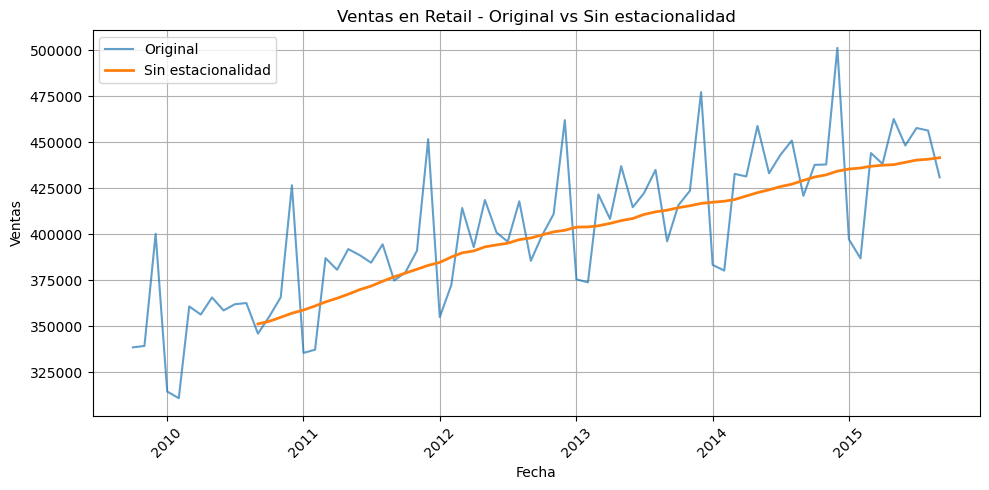

In [130]:
## Representamos el resultado

plt.figure(figsize=(10,5))
plt.plot(df_sales.index, df_sales['sales'], label='Original', alpha=0.7)
plt.plot(df_sales.index, df_sales['sales_mm'], label='Sin estacionalidad', linewidth=2)
plt.title('Ventas en Retail - Original vs Sin estacionalidad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### b) Elimina la tendencia y representa los resultados.

##### *P: ¿Cómo podemos eliminar la tendencia?*

In [131]:
"""
Utilizando la Diferenciación.

Consiste en restar a cada valor el valor anterior (primera diferencia). 
Esto convierte la serie en cambios o variaciones, eliminando la tendencia.

"""

# Imprementacion
# 
# Primero eliminamos la estacionalidad con media móvil de 12 meses
# ventana = 12
# df_sales['sales_mm'] = df_sales['sales'].rolling(ventana).mean()
# luego la tendencia mediante diferenciación
# df_sales['sales_mm_st'] = df_sales['sales_mm'].diff(1)


'\nUtilizando la Diferenciación.\n\nConsiste en restar a cada valor el valor anterior (primera diferencia). \nEsto convierte la serie en cambios o variaciones, eliminando la tendencia.\n\n'

In [132]:
## Eliminamos la tendencia
df_sales['sales_mm_st'] = df_sales['sales_mm'].diff(1)
df_sales

,sales,sales_mm,sales_mm_st
2009-10-01,338630.0,NaN,NaN
2009-11-01,339386.0,NaN,NaN
2009-12-01,400264.0,NaN,NaN
2010-01-01,314640.0,NaN,NaN
2010-02-01,311022.0,NaN,NaN
...,...,...,...
2016-05-01,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN


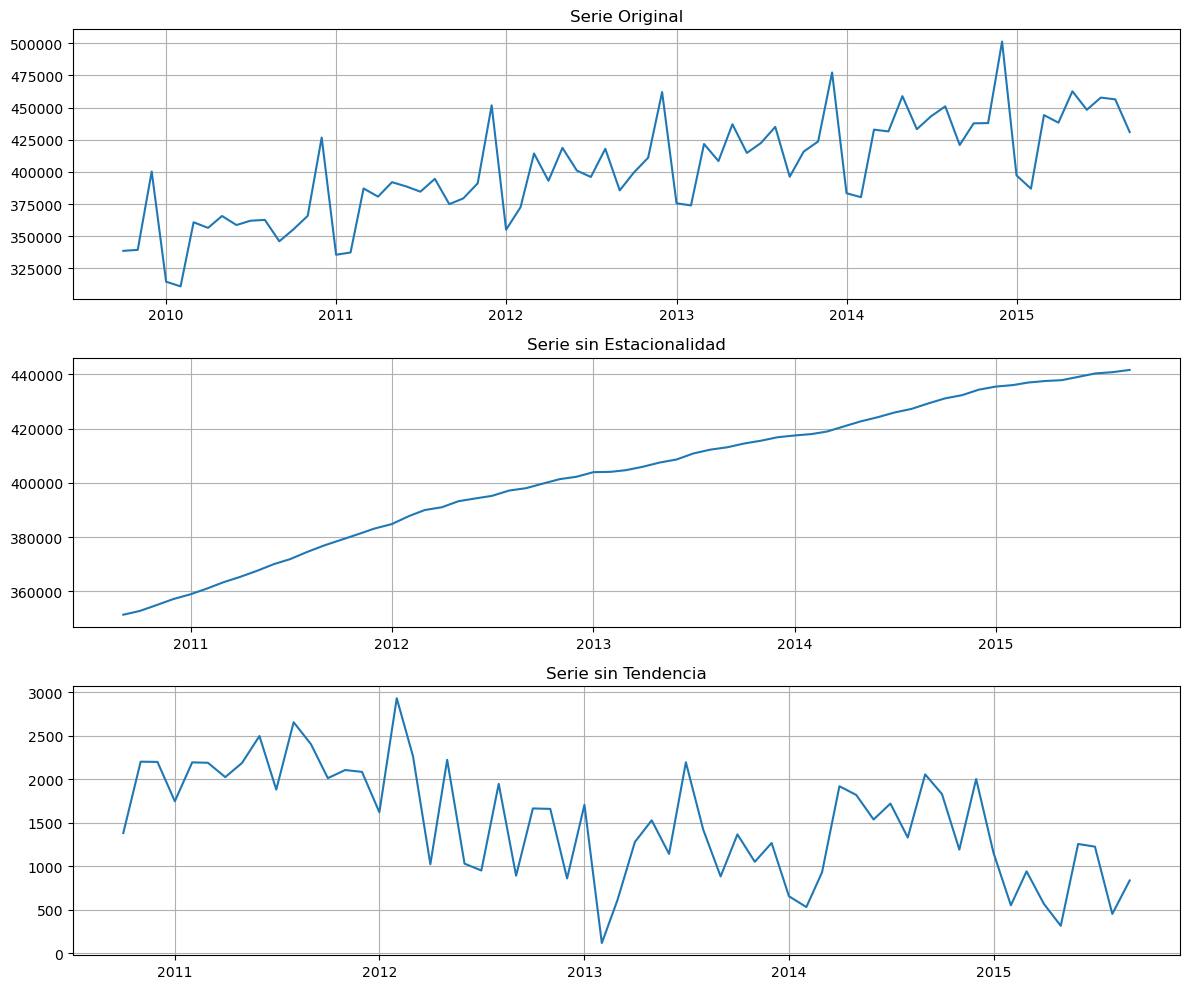

In [133]:
## Representamos el resultado
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Serie original
ax1.plot(df_sales.index, df_sales['sales'])
ax1.set_title('Serie Original')
ax1.grid(True)

# Serie sin estacionalidad
ax2.plot(df_sales.index, df_sales['sales_mm'])
ax2.set_title('Serie sin Estacionalidad')
ax2.grid(True)

# Serie sin tendencia
ax3.plot(df_sales.index, df_sales['sales_mm_st'])
ax3.set_title('Serie sin Tendencia')
ax3.grid(True)

plt.tight_layout()
plt.show()

### 4.2.-  Realizar la previsión

Realiza la previsión sobre la componente aleatoria. Utiliza alguno de los modelos que hemos visto y representa los resultados.

In [134]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_sales['prevision_M3b'] = np.nan

# Calculamos la media de la componente aleatoria para los últimos 12 meses
media_aleatoria = df_sales['sales_mm_st'].dropna().tail(12).mean()

# Asignamos esta media como previsión para los próximos 12 meses
df_sales.loc[df_sales.tail(12).index, 'prevision_M3b'] = media_aleatoria
df_sales


,sales,sales_mm,sales_mm_st,prevision_M3b
2009-10-01,338630.0,NaN,NaN,NaN
2009-11-01,339386.0,NaN,NaN,NaN
2009-12-01,400264.0,NaN,NaN,NaN
2010-01-01,314640.0,NaN,NaN,NaN
2010-02-01,311022.0,NaN,NaN,NaN
...,...,...,...,...
2016-05-01,NaN,NaN,NaN,1027.1875
2016-06-01,NaN,NaN,NaN,1027.1875
2016-07-01,NaN,NaN,NaN,1027.1875
2016-08-01,NaN,NaN,NaN,1027.1875


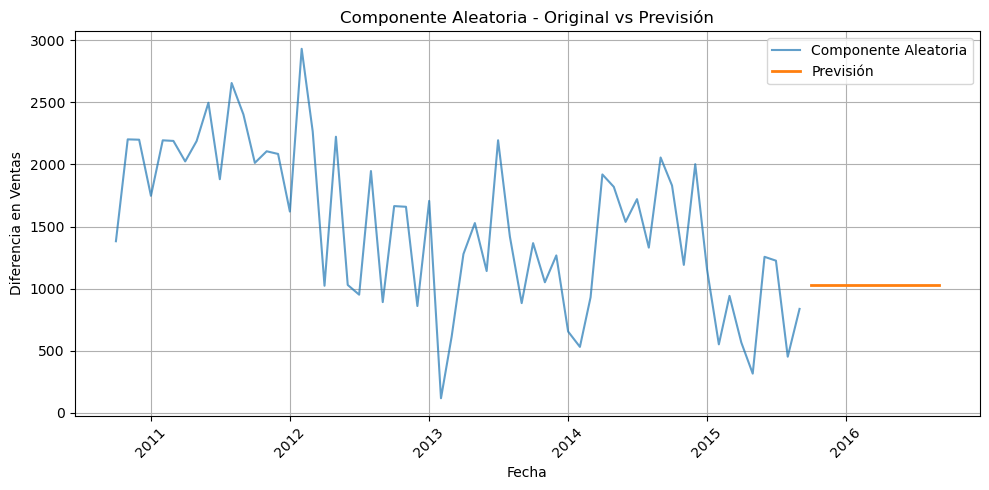

In [135]:
## Representamos nuestra previsión
# Visualizamos la previsión de la componente aleatoria
plt.figure(figsize=(10,5))
plt.plot(df_sales.index, df_sales['sales_mm_st'], label='Componente Aleatoria', alpha=0.7)
plt.plot(df_sales.index, df_sales['prevision_M3b'], label='Previsión', linewidth=2)
plt.title('Componente Aleatoria - Original vs Previsión')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### *P: Esta previsión, ¿qué significa? ¿cómo lo puedo convertir en un número que se parezca a mis alquileres?*

In [136]:
"""

Esta previsión que vemos en el gráfico (línea naranja) representa solo los 
cambios o variaciones mensuales que esperamos en las ventas, pero NO 
son las ventas reales.

Para convertir estos cambios en ventas reales necesitamos:
1. Volver a añadir la tendencia (para tener valores absolutos, no solo cambios)
2. Volver a añadir la estacionalidad (para capturar los patrones mensuales)

Es como si hubiéramos "desarmado" la serie en piezas para analizarla, y ahora 
necesitamos "rearmarla" para obtener una previsión final en las mismas unidades 
que nuestras ventas originales.

"""

'\n\nEsta previsión que vemos en el gráfico (línea naranja) representa solo los \ncambios o variaciones mensuales que esperamos en las ventas, pero NO \nson las ventas reales.\n\nPara convertir estos cambios en ventas reales necesitamos:\n1. Volver a añadir la tendencia (para tener valores absolutos, no solo cambios)\n2. Volver a añadir la estacionalidad (para capturar los patrones mensuales)\n\nEs como si hubiéramos "desarmado" la serie en piezas para analizarla, y ahora \nnecesitamos "rearmarla" para obtener una previsión final en las mismas unidades \nque nuestras ventas originales.\n\n'

### 4.3.-  Incorporar las componentes de la serie: estacionalidad y tendencia

#### a) Incorpora la tendencia a la previsión de alquileres y representa los resultados.

In [137]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan 
df_sales['prevision_M3b_ct']=np.nan
df_sales['replica'] = np.nan

# Tomamos el último valor conocido de la serie sin estacionalidad
ultimo_valor = df_sales['sales_mm'].dropna().iloc[-1]
df_sales.loc[df_sales.tail(12).index, 'replica'] = ultimo_valor
df_sales

,sales,sales_mm,sales_mm_st,prevision_M3b,prevision_M3b_ct,replica
2009-10-01,338630.0,NaN,NaN,NaN,NaN,NaN
2009-11-01,339386.0,NaN,NaN,NaN,NaN,NaN
2009-12-01,400264.0,NaN,NaN,NaN,NaN,NaN
2010-01-01,314640.0,NaN,NaN,NaN,NaN,NaN
2010-02-01,311022.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2016-05-01,NaN,NaN,NaN,1027.1875,NaN,441597.416667
2016-06-01,NaN,NaN,NaN,1027.1875,NaN,441597.416667
2016-07-01,NaN,NaN,NaN,1027.1875,NaN,441597.416667
2016-08-01,NaN,NaN,NaN,1027.1875,NaN,441597.416667


In [138]:
# Calculamos la previsión acumulando las diferencias
df_sales.loc[df_sales.tail(12).index, 'prevision_M3b_ct'] = (
    df_sales.tail(12)['prevision_M3b'].cumsum() + 
    df_sales.tail(12)['replica']
)
df_sales

,sales,sales_mm,sales_mm_st,prevision_M3b,prevision_M3b_ct,replica
2009-10-01,338630.0,NaN,NaN,NaN,NaN,NaN
2009-11-01,339386.0,NaN,NaN,NaN,NaN,NaN
2009-12-01,400264.0,NaN,NaN,NaN,NaN,NaN
2010-01-01,314640.0,NaN,NaN,NaN,NaN,NaN
2010-02-01,311022.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2016-05-01,NaN,NaN,NaN,1027.1875,449814.916667,441597.416667
2016-06-01,NaN,NaN,NaN,1027.1875,450842.104167,441597.416667
2016-07-01,NaN,NaN,NaN,1027.1875,451869.291667,441597.416667
2016-08-01,NaN,NaN,NaN,1027.1875,452896.479167,441597.416667


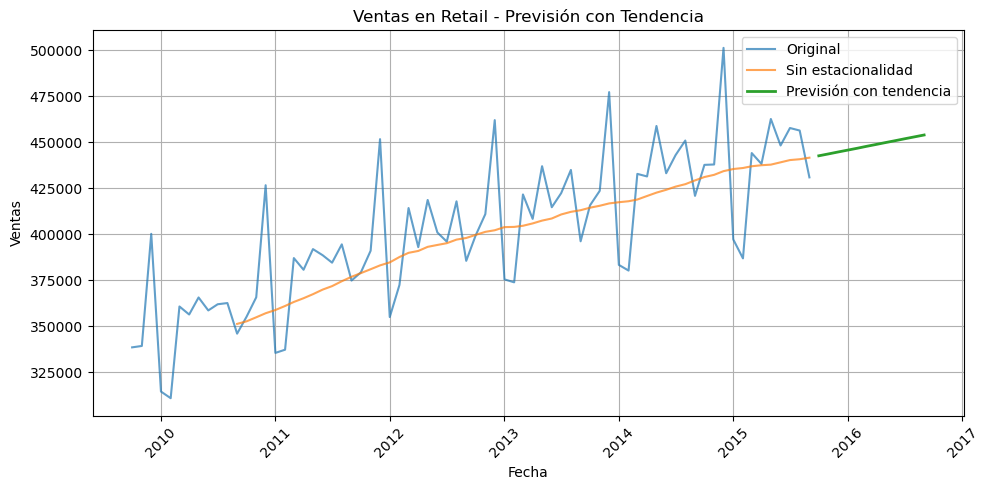

In [139]:
## Representamos nuestra previsión
plt.figure(figsize=(10,5))
plt.plot(df_sales.index, df_sales['sales'], label='Original', alpha=0.7)
plt.plot(df_sales.index, df_sales['sales_mm'], label='Sin estacionalidad', alpha=0.7)
plt.plot(df_sales.index, df_sales['prevision_M3b_ct'], label='Previsión con tendencia', linewidth=2)
plt.title('Ventas en Retail - Previsión con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### b) Incorpora la estacionalidad a la previsión de alquileres y representa los resultados.

Una forma sencilla sería calcular los coeficientes de estacionalidad vs la serie de media móvil y aplicar los últimos coeficientes ( o una media, ...) a mis previsiones para incorporar la estacionalidad.

In [140]:
## Calculamos los coeficientes de estacionalidad
df_sales['coef_estac'] = df_sales['sales'] / df_sales['sales_mm']
df_sales

,sales,sales_mm,sales_mm_st,prevision_M3b,prevision_M3b_ct,replica,coef_estac
2009-10-01,338630.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-01,339386.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-01,400264.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,314640.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,311022.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016-05-01,NaN,NaN,NaN,1027.1875,449814.916667,441597.416667,NaN
2016-06-01,NaN,NaN,NaN,1027.1875,450842.104167,441597.416667,NaN
2016-07-01,NaN,NaN,NaN,1027.1875,451869.291667,441597.416667,NaN
2016-08-01,NaN,NaN,NaN,1027.1875,452896.479167,441597.416667,NaN


In [141]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
## Como queremos la previsión para 4 trimestres, desplazamos esos coeficientes y los multiplicamos por 
## el valor de la previsión con tendencia
df_sales['prevision_M3b_ct_cs'] = (
    df_sales['prevision_M3b_ct'] * 
    df_sales['coef_estac'].shift(12)
)
df_sales

,sales,sales_mm,sales_mm_st,prevision_M3b,prevision_M3b_ct,replica,coef_estac,prevision_M3b_ct_cs
2009-10-01,338630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-01,339386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-01,400264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,314640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,311022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-05-01,NaN,NaN,NaN,1027.1875,449814.916667,441597.416667,NaN,475282.528813
2016-06-01,NaN,NaN,NaN,1027.1875,450842.104167,441597.416667,NaN,460233.480395
2016-07-01,NaN,NaN,NaN,1027.1875,451869.291667,441597.416667,NaN,469728.220902
2016-08-01,NaN,NaN,NaN,1027.1875,452896.479167,441597.416667,NaN,468905.213896


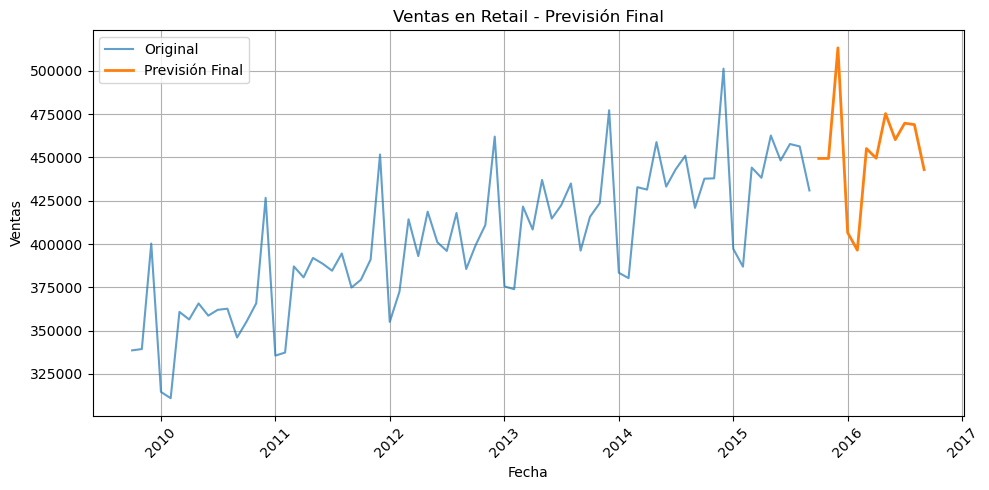

In [142]:
## Representamos nuestra previsión
plt.figure(figsize=(10,5))
plt.plot(df_sales.index, df_sales['sales'], label='Original', alpha=0.7)
plt.plot(df_sales.index, df_sales['prevision_M3b_ct_cs'], 
         label='Previsión Final', linewidth=2)
plt.title('Ventas en Retail - Previsión Final')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()